## EMPIRICAL DISTRIBUTIONS

In data science, the word "empirical" means "observed". Empirical distributions are
distributions of observed data, such as data in random samples. Here we generate data and see what the empirical distribution looks like.

As a recap, plotting a normal distribution from sns library is shown below, before we move on to Empirical Distributions

In [1]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [2]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

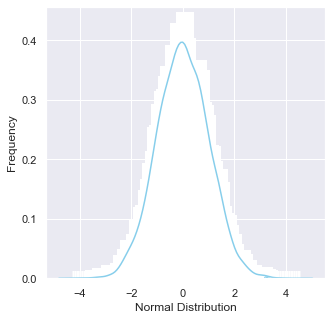

In [3]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency');

Similarly probability of rolling a die being 1/6 will be reflected as such in a probability distribution

##### Empirical distribution

The setting is a simple experiment: rolling a die multiple times and keeping track of which
face appears. All the numbers appear exactly once, as we are assuming that the die is fair.

A Probability Distribution¶
The histogram below helps us visualize the fact that every face appears with probability 1/6. We say that the histogram shows the distribution of probabilities over all the possible faces.Since all the bars represent the same percent chance, the distribution is called uniform on the integers 1 through 6.

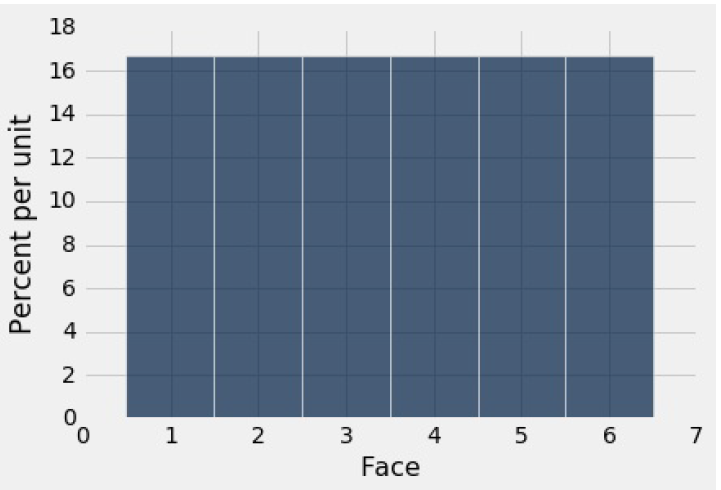

Variables whose successive values are separated by the same fixed amount, such as the values on rolls of a die (successive values separated by 1), fall into a class of variables that are called discrete. The histogram above is called a discrete histogram. Its bins are specified by the array

#### Empirical Distributions¶
The distribution above consists of the theoretical probability of each face. It is not based on data. It can be studied and understood without any dice being rolled.

Empirical distributions, on the other hand, are distributions of observed data. They can be visualized by empirical histograms.
Let us get some data by simulating rolls of a die. This can be done by sampling at random with replacement from the integers 1 through 6. We have used np.random.choice.

In [1]:
import numpy as np

In [2]:
pp = np.arange(1, 7, 1)
pp

array([1, 2, 3, 4, 5, 6])

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(data = pp) 
df

,0
0,1
1,2
2,3
3,4
4,5
5,6


Employ the method sample. It draws at random with replacement from the rows of a dataframe. Its argument is the sample size

In [8]:
pp = df.sample(n = 10, replace = True)

In [9]:
pp

,0
5,6
1,2
4,5
0,1
4,5
3,4
5,6
1,2
2,3
3,4


In [10]:
type(pp)

pandas.core.frame.DataFrame

###  Empirical Histograms¶
Here is an empirical histogram of 10 rolls. It doesn't look very much like the probability histogram above. Run the cell a few times to see how it varies.

In [11]:
from matplotlib import pyplot as plt 
%matplotlib inline

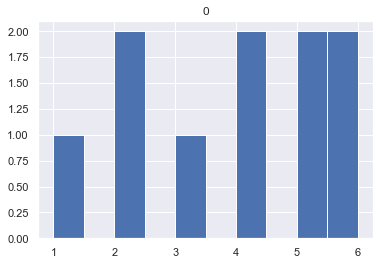

In [12]:
pp.hist();

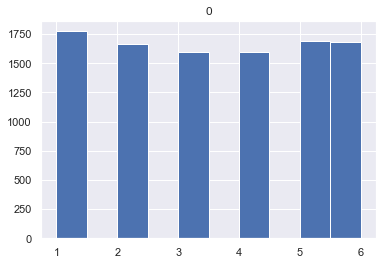

In [13]:
pp = df.sample(n = 10000, replace = True)
pp.hist();

As we increase the number of rolls in the simulation, the area of each bar gets closer 16.67%, which is the area of each bar in the probability histogram. What we have observed in an instance of a general rule: The Law of Averages

### The Law of Averages

If a chance experiment is repeated independently and under identical conditions, then, in the long run, the proportion of times that an event occurs gets closer and closer to the theoretical probability of the event.

For example, in the long run, the proportion of times the face with four spots appears gets closer and closer to 1/6.

Here "independently and under identical conditions" means that every repetition is performed in the same way regardless of the results of all the other repetitions

### Sampling from a Population

The law of averages also holds when the random sample is drawn from individuals in a large population.

As an example, see a population of flight delay times.  Data: United Airlines domestic flights departing from San Francisco in the summer of 2015. 

There are 13,825 rows, each corresponding to a flight. The columns are the date of the flight, the flight number, the destination airport code, and the departure delay time in minutes. Some delay times are negative; those flights left early.

In [4]:
united = pd.read_csv('https://github.com/flaviovdf/evcomp2018/raw/master/data/united_summer2015.csv')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


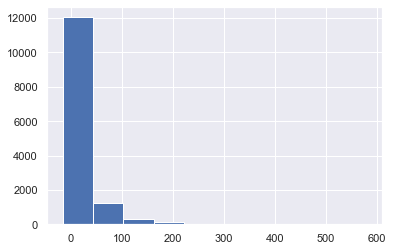

In [20]:
united['Delay'].hist();

One flight departed 16 minutes early, and one was 580 minutes late. The other delay times were almost all between -10 minutes and 200 minutes.

In [5]:
united['Delay'].max()

580

In [6]:
united['Delay'].min()

-16

In [7]:
united['Delay'].mean()

16.658155515370705

In [8]:
type(united['Delay'])

pandas.core.series.Series

In [9]:
united_200 = united[united['Delay'] < 200]

In [10]:
united_200

,Date,Flight Number,Destination,Delay
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


In [11]:
united_200['Delay'].max()

198

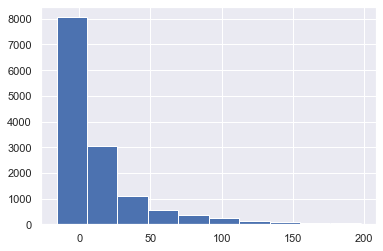

In [28]:
united_200['Delay'].hist()

For the purpose here zoom in on the bulk of the data and ignore the 0.8% of flights that had delays of more than 200 minutes. This restriction is just for visualconvenience; the table still retains all the data.

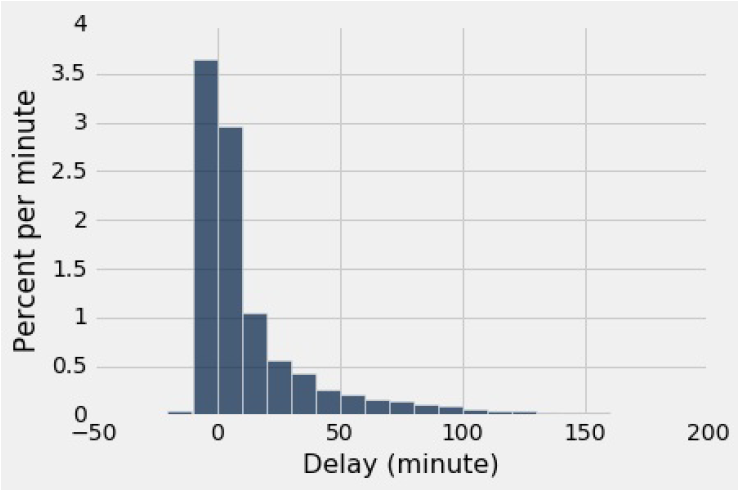

The height of the [0, 10) bar is just under 3% per minute, which means that just under 30% of the flights had delays between 0 and 10 minutes.

### Empirical Distribution of Sample

Now think of the 13,825 flights as a population, and draw random samples from it with replacement.

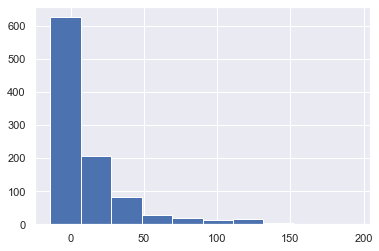

In [30]:
pp = united_200['Delay'].sample(n = 1000, replace = True)
pp.hist();

### Convergence of the Empirical Histogram of the Sample

What we have observed in this section can be summarized as follows:
---For a large random sample, the empirical histogram of the sample resembles the histogram of the population, with high probability.
---This justifies the use of large random samples in statistical inference. The idea is that since a large random sample is likely to resemble the population from which it is drawn, quantities computed from the values in the sample are likely to be close to the corresponding quantities in the population.

### Empirical Distribution of a Statistic

### Statistic

In many situations, we will be interested in figuring out the value of an unknown parameter.For this, we will rely on data from a large random sample from the population.
A statistic (note the singular!) is any number computed using the data in a sample. The sample median, therefore, is a statistic.

### The Power of Simulation

If we could generate all possible random samples , we would know all possible
values of the statistic (e.g., the sample median), as well as the probabilities of all those values.
We could visualize all the values and probabilities in the probability histogram of the statistic.
But in many situations, the number of all possible samples is large enough to exceed the capacity of the computer, and purely mathematical calculations of the probabilities can be intractably difficult.

This is where empirical histograms come in. We know that by the Law of Averages, the empirical histogram of the statistic is likely to resemble the probability histogram of the statistic, if the sample size is large and if you repeat the sampling process numerous times. 

This means that simulating random processes repeatedly is a way of approximating probability distributions without figuring out the probabilities mathematically or generating all possible random samples. Thus computer simulations become a powerful tool in data science. They can help data scientists understand the properties of random quantities that would be complicated to analyze in other ways.

### Testing Hypotheses

Data scientists are often faced with yes-no questions about the world. ex
Is chocolate good for you?
Is coffee good for the heart?

Whether chocolate or any other treatment is good for you will almost certainly have to be
decided by medical experts, but an initial step consists of using data science to analyze data
from studies and randomized experiments.
We move on to try to answer such yes-no questions, basing our conclusions on random samples and empirical distributions.

Empirical Distribution of a Statistic¶

The Law of Averages implies that with high probability, the empirical distribution of a large
random sample will resemble the distribution of the population from which the sample was drawn.

The resemblance is visible in histograms: the empirical histogram of a large random sample is likely to resemble the histogram of the population.


In [12]:
import pandas as pd
united = pd.read_csv('https://github.com/flaviovdf/evcomp2018/raw/master/data/united_summer2015.csv')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


In [32]:
united.to_csv("E:/2020/DS/19AI611/python_data_csv/united_summer2015.csv")

In [33]:
import os
os.chdir("E:/2020/DS/19AI611/python_data_csv")

In [7]:
!dir united*.*

 Volume in drive E is New Volume
 Volume Serial Number is 0436-EC31

 Directory of E:\2020\DS\19AI611\python_data_csv

10/27/2020  09:37 PM           349,049 united_summer2015.csv
               1 File(s)        349,049 bytes
               0 Dir(s)  105,263,562,752 bytes free


In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

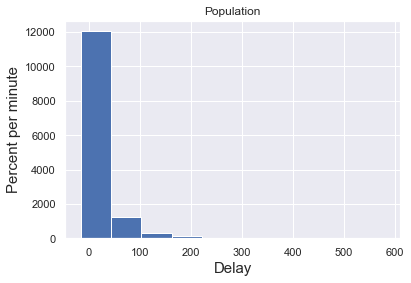

In [35]:
delay_bins = np.arange(-20, 201, 10)
united['Delay'].hist()
plt.title('Population');
plt.xlabel('Delay',fontsize=15)
plt.ylabel('Percent per minute',fontsize=15);

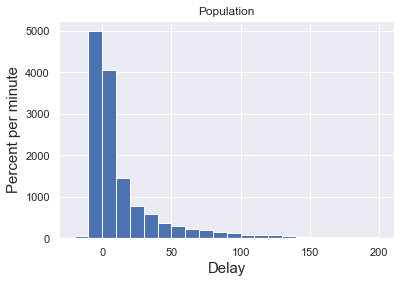

In [36]:
delay_bins = np.arange(-20, 201, 10)
united['Delay'].hist(bins = delay_bins)
plt.title('Population');
plt.xlabel('Delay',fontsize=15)
plt.ylabel('Percent per minute',fontsize=15);

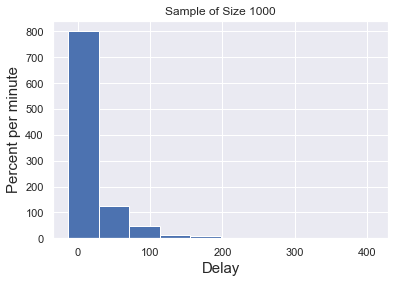

In [37]:
sample_1000 = united['Delay'].sample(n = 1000, replace = True)
sample_1000.hist();
plt.title('Sample of Size 1000');
plt.xlabel('Delay',fontsize=15)
plt.ylabel('Percent per minute',fontsize=15);

The two histograms clearly resemble each other, though they are not identical.

### Parameter

Frequently, we are interested in numerical quantities associated with a population.

---In a population of voters, what percent will vote for Candidate A?
---In a population of Facebook users, what is the largest number of Facebook friends that the users have?
---In a population of United flights, what is the median departure delay?

Numerical quantities associated with a population are called parameters. For the population
of flights in united, we know the value of the parameter "median delay":

In [38]:
united['Delay'].median()

2.0

The NumPy function median returns the median (half-way point) of an array. Among all the
flights in united , the median delay was 2 minutes. That is, about 50% of flights in the
population had delays of 2 or fewer minutes:

Half of all flights left no more than 2 minutes after their scheduled departure time. That's a very short delay!

Note. The percent isn't exactly 50 because of "ties," that is, flights that had delays of exactly 2 minutes. 
There were 480 such flights. Ties are quite common in data sets, and we will not worry about them in this course.

In [13]:
united.size

55300

### Statistic

In many situations, we will be interested in figuring out the value of an unknown parameter.
For this, we will rely on data from a large random sample from the population.

A statistic (note the singular!) is any number computed using the data in a sample. The
sample median, therefore, is a statistic.

sample_1000 contains a random sample of 1000 flights from united . The
observed value of the sample median is:

In [21]:
sample_1000 = united['Delay'].sample(n = 1000, replace = True)

In [22]:
sample_1000.head(2)

3826    53
674      5
Name: Delay, dtype: int64

In [23]:
sample_1000.median()

3.0

Our sample – one set of 1,000 flights – gave us one observed value of the statistic. This
raises an important problem of inference:
The statistic could have been different. A fundamental consideration in using any statistic
based on a random sample is that the sample could have come out differently, and therefore
the statistic could have come out differently too.
np.median(united.sample(1000).column('Delay'))

In [25]:
sample_1000 = united['Delay'].sample(n = 1000, replace = True)
sample_1000.median()

2.0

Run the cell above a few times to see how the answer varies. Often it is equal to 2, the same
value as the population parameter. But sometimes it is different.
Just how different could the statistic have been? One way to answer this is to simulate
the statistic many times and note the values. 

A histogram of those values will tell us about the distribution of the statistic.

Let's recall the main steps in a simulation.

### Simulating a Statistic

We will simulate the sample median using the steps we set up in an earlier chapter when we
started studying simulation. You can replace the sample size of 1000 by any other sample
size, and the sample median by any other statistic.

Step 1: Decide which statistic to simulate. We have already decided that: we are going to
simulate the median of a random sample of size 1000 drawn from the population of flight
delays.

Step 2: Write the code to generate one value of the statistic. Draw a random sample of
size 1000 and compute the median of the sample. 

Step 3: Decide how many simulated values to generate..... may be 5,000 repetitions.

Step 4: Write the code to generate an array of simulated values. As in all simulations,
we start by creating an empty array in which we will collect our results. We will then set up a
for loop for generating all the simulated values. The body of the loop will consist of
generating one simulated value of the sample median, and appending it to our collection
array.

The simulation takes a noticeable amount of time to run. That is because it is performing
5000 repetitions of the process of drawing a sample of size 1000 and computing its median.
That's a lot of sampling and repeating!

In [49]:
medians = []

In [50]:
type(medians)

list

In [51]:
import numpy as np

In [52]:
import array

In [53]:
medians = np.zeros(5000)

In [54]:
type(medians)

numpy.ndarray

In [58]:
for i in np.arange(5000):
    new_median = (united['Delay'].sample(n = 1000, replace = True)).median()
    medians[i] = new_median

In [59]:
medians

array([3., 3., 2., ..., 3., 2., 3.])

The simulation is done. All 5,000 simulated sample medians have been collected in the
array medians . Now it's time to visualize the results.

In [60]:
med_df = pd.DataFrame(medians)
med_df.head(3)

,0
0,3.0
1,3.0
2,2.0


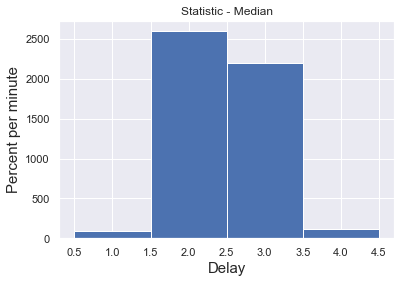

In [61]:
med_df.hist(bins=np.arange(0.5, 5, 1));
plt.title('Statistic - Median');
plt.xlabel('Delay',fontsize=15)
plt.ylabel('Percent per minute',fontsize=15);

You can see that the sample median is very likely to be close to 2, which was the value of the population median.

Since samples of 1000 flight delays are likely to resemble the population of delays, it is not surprising that the median delays of those samples should be close to the median delay in the population.
This is an example of how a statistic can provide a good estimate of a parameter.

#### The Power of Simulation

If we could generate all possible random samples of size 1000, we would know all possible
values of the statistic (the sample median), as well as the probabilities of all those values.
We could visualize all the values and probabilities in the probability histogram of the statistic.
But in many situations (including this one), the number of all possible samples is large
enough to exceed the capacity of the computer, and purely mathematical calculations of the
probabilities can be intractably difficult.

This is where empirical histograms come in.

We know that by the Law of Averages, the empirical histogram of the statistic is likely to
resemble the probability histogram of the statistic, if the sample size is large and if you
repeat the sampling process numerous times.
This means that simulating random processes repeatedly is a way of approximating
probability distributions without figuring out the probabilities mathematically or generating all
possible random samples. Thus computer simulations become a powerful tool in data
science. They can help data scientists understand the properties of random quantities that
would be complicated to analyze in other ways.

#### Next Testing Hypothesis